BEN outperforms traditional SOTA methods and advantageously adapts to 
datasets from various domains across multiple species, modalities, and field strengths.

Here we give one exemplar species:


1.   Human (from **UK-biobank**)



## 1. Download table.

In [1]:
!gdown --id 1iEQo14I40feffysbZ9Ywj8amWXCD61Cc
!sh download_human_table.sh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1iEQo14I40feffysbZ9Ywj8amWXCD61Cc
To: /content/download_human_table.sh
100% 85.0/85.0 [00:00<00:00, 131kB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1dA4NulnqgaTiDfbOxqIIi2rDkgHmhn6s
To: /content/Human_table.zip
100% 432k/432k [00:00<00:00, 39.6MB/s]
Archive:  Human_table.zip
  inflating: Fig2-violin-Human-T1.xlsx  
  inflating: Fig2-vol-regress-Human-unique-T1.xlsx  


##  2. Violin plot (y axis: Dice score)

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel(r'Fig2-violin-Human-T1.xlsx')


In [4]:
colors_reds = sns.color_palette('Reds')[3:]

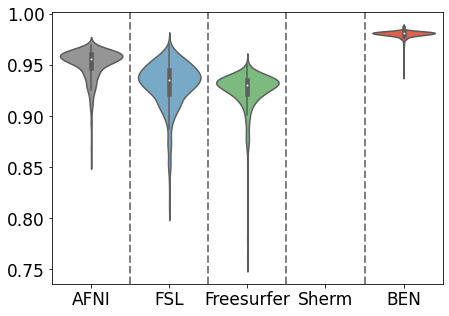

In [5]:
plt.figure(figsize=(7, 5))

ax = sns.violinplot(x="Method", y="Dice", data=data[data['Method']=='AFNI'],

                    hue='Center',
                    scale='width',
                    order=['AFNI', 'FSL','Freesurfer','Sherm','Proposed'], 
                    palette='Greys',
                )

ax = sns.violinplot(x="Method", y="Dice", data=data[data['Method']=='FSL'],
                    hue='Center',
                    scale='width',
                    order=['AFNI', 'FSL','Freesurfer','Sherm','Proposed'],  
                    palette='Blues',

                )

ax = sns.violinplot(x="Method", y="Dice", data=data[data['Method']=='Freesurfer'],
                    hue='Center',
                    scale='width',
                    order=['AFNI', 'FSL','Freesurfer','Sherm','Proposed'],  
                    palette='Greens',

                )

ax = sns.violinplot(x="Method", y="Dice", data=data[data['Method']=='BEN'],

                    hue='Center',
                    scale='width',
                    order=['AFNI', 'FSL','Freesurfer','Sherm','BEN'],  
                    palette=colors_reds,

                )

plt.axvline(x=0.5, color="gray",ls="--", lw=2)
plt.axvline(x=1.5, color="gray",ls="--", lw=2)
plt.axvline(x=2.5, color="gray",ls="--", lw=2)
plt.axvline(x=3.5, color="gray",ls="--", lw=2)

plt.legend('', frameon=False) 

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel(xlabel='')
plt.ylabel(ylabel='')

plt.show()

## 3. Regress plot

Text(32.31847222222222, 0.5, '')

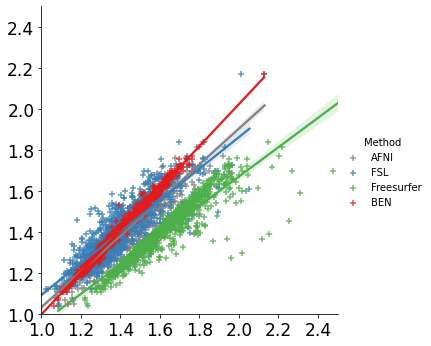

In [7]:
data = pd.read_excel(r'Fig2-vol-regress-Human-unique-T1.xlsx')
data['Vol']=data['Vol']/1000/1000  # (dm^3)
data['GT']=data['GT']/1000/1000

colors = sns.color_palette('Greys')[3:4]
colors.extend(sns.color_palette("Set1")[1:3])
colors.extend(sns.color_palette('Set1')[0:1])

# UKB-3T
sns.lmplot(x='Vol', y='GT', hue='Method', data=data[data['Center']=='UKB'],
           markers=['+', '+', '+', '+'],
           palette=colors,
           hue_order=['AFNI', 'FSL','Freesurfer','BEN']
          )
plt.xlim([1, 2.5])
plt.ylim([1, 2.5])

plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.xlabel(xlabel='')
plt.ylabel(ylabel='')
